In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#### Generating Subgroups 

##### As a next step in our EDA, we also explored the possibilities of generating subject groups which have the same progression of KLG over the timepoints where their data were collected. As we can recall from our initial exploration, there were 4503 unique subjects examined in this dataset. So, we made a groupby function that brings together the subjects having the same KLG progression.

#### The figure below shows how KLG has progressed for a patient at different timepoints.

In [2]:
data = pd.read_csv("data/knee_features.csv")
data = data.dropna()
data = data.drop_duplicates()
data = data.sort_index().sort_values(by = ['ID','LATERALITY'], kind='mergesort').reset_index()
data["KLG"] = data["KLG"].astype(int)
data["KLG"] = data["KLG"].astype(str)
data = data.groupby(["ID", "LATERALITY"]).agg({"KLG" : lambda x: [item if isinstance(item, str) else +(item) for item in x]}).reset_index()
data["NEWKLG"] = data["KLG"].apply(''.join)
data

,ID,LATERALITY,KLG,NEWKLG
0,9000099,LEFT,"[3, 4, 4]",344
1,9000099,RIGHT,"[2, 2, 2, 2, 2]",22222
2,9000296,LEFT,"[3, 3, 3, 3]",3333
3,9000296,RIGHT,"[2, 2, 2, 2]",2222
4,9000622,LEFT,"[1, 1]",11
...,...,...,...,...
8886,9999862,RIGHT,"[2, 3, 3, 3]",2333
8887,9999865,LEFT,"[1, 1, 1, 1, 2]",11112
8888,9999865,RIGHT,"[0, 0, 0, 0, 0, 0]",000000
8889,9999878,LEFT,"[1, 1, 1, 1, 1, 1]",111111


In [3]:
data["NEWKLG"].value_counts().head(20)

0000000    970
22222      843
000000     472
2222       468
00000      456
1111111    361
33333      351
000        312
0000       295
00         261
222        252
3333       206
22         189
111111     185
11111      181
33         153
333        150
1111       143
111        127
2          120
Name: NEWKLG, dtype: int64

### Subject Groups Generation

<AxesSubplot:>

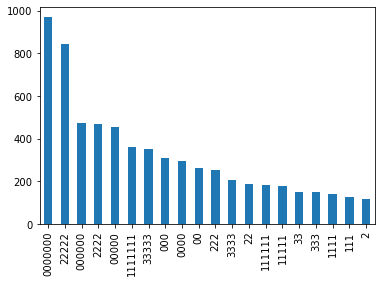

In [4]:
data['NEWKLG'].value_counts()[:20].plot(kind='bar')

#### Interpretation

##### The figure above can be read as follows. The most popular group is 00000000 which has close to 1000 subjects. Here, the KLG levels remained the same over all the timepoints where data were collected. Second comes the group 22222 where data was only collected for the five timepoints and the KLG levels of all the subjects in this group remained 2 over those timepoints. 6 out of the top 10 results are the different variants of zero KLG scale. Most of the top observations are the KLG levels that remains the same over all the available timepoints. 